In [75]:

import pandas as pd # Import pandas library for data handling

# Load the dataset into a DataFrame
# 'low_memory=False' helps with correct data type detection
df = pd.read_csv('/Users/sadiksha777/Desktop/mon sujet/Smart Data Discovery/Coursework/Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

df # Display the Dataframe

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [77]:

import pandas as pd  # Import pandas 

# Load the dataset
data = pd.read_csv('/Users/sadiksha777/Desktop/mon sujet/Smart Data Discovery/Coursework/Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

# Convert 'Created Date' to datetime format
data['Created Date'] = pd.to_datetime(data['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Convert 'Closed Date' to datetime format
data['Closed Date'] = pd.to_datetime(data['Closed Date'], format='%m-%d-%y %H:%M', errors='coerce')

# Calculate time difference between 'Created Date' and 'Closed Date' in hours
data['Request_Closing_Time'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds() / 3600

# Round the time difference to 2 decimal places
data['Request_Closing_Time'] = data['Request_Closing_Time'].round(2)

# Display the first few rows of the relevant columns
data[['Created Date', 'Closed Date', 'Request_Closing_Time']].head()

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0.92
1,2015-12-31 23:59:44,2016-01-01 01:26:00,1.44
2,2015-12-31 23:59:29,2016-01-01 04:51:00,4.86
3,2015-12-31 23:57:46,2016-01-01 07:43:00,7.75
4,2015-12-31 23:56:58,2016-01-01 03:24:00,3.45


In [81]:
# List of columns to drop
columns_to_drop = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
    'Address Type', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number',
    'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 
    'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
    'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]

# Drop the irrelevant columns from the dataset
# The result is stored in 'data_cleaned', keeping the original DataFrame intact
data_cleaned = data.drop(columns=columns_to_drop)

# Print the remaining columns to confirm that the irrelevant columns have been dropped
print("Remaining columns:")
print(data_cleaned.columns)

Remaining columns:
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')


In [83]:
# Remove rows containing NaN values from the 'data_cleaned' DataFrame
data_cleaned = data_cleaned.dropna()

# Print the shape of the DataFrame after removing NaN values
print(f"Data shape after dropping NaN values: {data_cleaned.shape}")

Data shape after dropping NaN values: (2180, 15)


In [22]:

# Loop through each column in the cleaned dataframe and get unique values
for column in data_cleaned.columns:
    unique_values = data_cleaned[column].unique()  # Get the unique values in the current column
    print(f"Unique values in '{column}' ({len(unique_values)} total):")  # Print column name and count of unique values
    print(unique_values)  # Print the unique values
    print("\n" + "-"*80 + "\n")  # Print a separator line for readability


Unique values in 'Unique Key' (2180 total):
[32310363 32309934 32309159 ... 30289888 30295176 30291996]

--------------------------------------------------------------------------------

Unique values in 'Created Date' (2169 total):
<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-31 10:21:14', '2015-03-31 09:54:58', '2015-03-31 09:40:46',
 '2015-03-31 08:53:04', '2015-03-31 07:58:17', '2015-03-31 03:10:24',
 '2015-03-30 23:33:17', '2015-03-30 22:17:05', '2015-03-30 18:00:13',
 '2015-03-30 14:52:46']
Length: 2169, dtype: datetime64[ns]

--------------------------------------------------------------------------------

Unique values in 'Closed Date' (1387 total):
<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '201

In [38]:
# Sum of numeric columns
print("Sum:\n", data_cleaned.sum(numeric_only=True))

# Mean of numeric columns
print("\nMean:\n", data_cleaned.mean(numeric_only=True))

# Standard Deviation of numeric columns
print("\nStandard Deviation:\n", data_cleaned.std(numeric_only=True))

# Skewness of numeric columns
print("\nSkewness:\n", data_cleaned.skew(numeric_only=True))

# Kurtosis of numeric columns
print("\nKurtosis:\n", data_cleaned.kurtosis(numeric_only=True))

Sum:
 Unique Key              6.820908e+10
Incident Zip            2.371378e+07
Latitude                8.879050e+04
Longitude              -1.611441e+05
Request_Closing_Time    2.054050e+04
dtype: float64

Mean:
 Unique Key              3.128857e+07
Incident Zip            1.087788e+04
Latitude                4.072959e+01
Longitude              -7.391931e+01
Request_Closing_Time    9.422248e+00
dtype: float64

Standard Deviation:
 Unique Key              595606.354909
Incident Zip               528.767424
Latitude                     0.086522
Longitude                    0.082031
Request_Closing_Time        10.806216
dtype: float64

Skewness:
 Unique Key             -0.002909
Incident Zip           -0.513447
Latitude                0.039672
Longitude              -0.531003
Request_Closing_Time    3.388213
dtype: float64

Kurtosis:
 Unique Key              -1.102560
Incident Zip            -1.383673
Latitude                -0.797759
Longitude                1.796642
Request_Closing_Tim

In [9]:
# Import necessary libraries
import pandas as pd  # For handling data
from sklearn.preprocessing import LabelEncoder  # For encoding categorical columns

# Load the dataset
data = pd.read_csv('/Users/sadiksha777/Desktop/mon sujet/Smart Data Discovery/Coursework/Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

# Drop irrelevant columns
columns_to_drop = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
    'Address Type', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number',
    'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 
    'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
    'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]

# Drop the irrelevant columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Remove rows containing NaN values
data_cleaned = data_cleaned.dropna()

# Convert 'Created Date' to datetime format with the specified format
data_cleaned['Created Date'] = pd.to_datetime(data_cleaned['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Convert 'Closed Date' to datetime format with the specified format
data_cleaned['Closed Date'] = pd.to_datetime(data_cleaned['Closed Date'], format='%m-%d-%y %H:%M', errors='coerce')

# Calculate the time to close the request (in days)
data_cleaned['Request Closing Time'] = (data_cleaned['Closed Date'] - data_cleaned['Created Date']).dt.days

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Calculate the correlation matrix for all variables (numeric and encoded categorical)
correlation_matrix = data_cleaned.corr()

# Round the correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# Display the updated correlation matrix in a well-structured table
print("Correlation Matrix (All Variables):")
print(correlation_matrix.to_string())  


Correlation Matrix (All Variables):
                        Unique Key  Created Date  Closed Date  Agency  Complaint Type  Descriptor  Location Type  Incident Zip  City  Status  Resolution Description  Borough  Latitude  Longitude  Request Closing Time
Unique Key                    1.00          0.07        -0.07     NaN           -0.08        0.01           0.01          0.03 -0.01     NaN                   -0.02     0.01     -0.03      -0.01                 -0.00
Created Date                  0.07          1.00        -0.97     NaN           -0.01       -0.00           0.00          0.00  0.00     NaN                    0.00     0.00     -0.00       0.00                 -0.01
Closed Date                  -0.07         -0.97         1.00     NaN            0.00        0.00          -0.00         -0.00 -0.00     NaN                   -0.01    -0.00      0.00       0.00                 -0.00
Agency                         NaN           NaN          NaN     NaN             NaN         Na

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/sadiksha777/Desktop/mon sujet/Smart Data Discovery/Coursework/Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

# Convert date columns to datetime
data['Created Date'] = pd.to_datetime(data['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
data['Closed Date'] = pd.to_datetime(data['Closed Date'], format='%m-%d-%y %H:%M', errors='coerce')

# Create 'Request_Closing_Time' column
data['Request_Closing_Time'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds() / 3600
data['Request_Closing_Time'] = data['Request_Closing_Time'].round(2)

# Drop irrelevant columns
columns_to_drop = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
    'Address Type', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number',
    'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 
    'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
    'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Drop rows with missing values
data_cleaned = data_cleaned.dropna()

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix (Cleaned Data):")
print(correlation_matrix)

Correlation Matrix (Cleaned Data):
                      Unique Key  Incident Zip  Latitude  Longitude  \
Unique Key              1.000000      0.055269  0.006555   0.083831   
Incident Zip            0.055269      1.000000 -0.513438   0.385861   
Latitude                0.006555     -0.513438  1.000000   0.390681   
Longitude               0.083831      0.385861  0.390681   1.000000   
Request_Closing_Time    0.018183      0.112057 -0.022812   0.203243   

                      Request_Closing_Time  
Unique Key                        0.018183  
Incident Zip                      0.112057  
Latitude                         -0.022812  
Longitude                         0.203243  
Request_Closing_Time              1.000000  


In [14]:
print("\nCorrelation Matrix:\n")
print(data_cleaned.corr(numeric_only=True))


Correlation Matrix:

                      Unique Key  Incident Zip  Latitude  Longitude  \
Unique Key              1.000000      0.055269  0.006555   0.083831   
Incident Zip            0.055269      1.000000 -0.513438   0.385861   
Latitude                0.006555     -0.513438  1.000000   0.390681   
Longitude               0.083831      0.385861  0.390681   1.000000   
Request_Closing_Time    0.018183      0.112057 -0.022812   0.203243   

                      Request_Closing_Time  
Unique Key                        0.018183  
Incident Zip                      0.112057  
Latitude                         -0.022812  
Longitude                         0.203243  
Request_Closing_Time              1.000000  


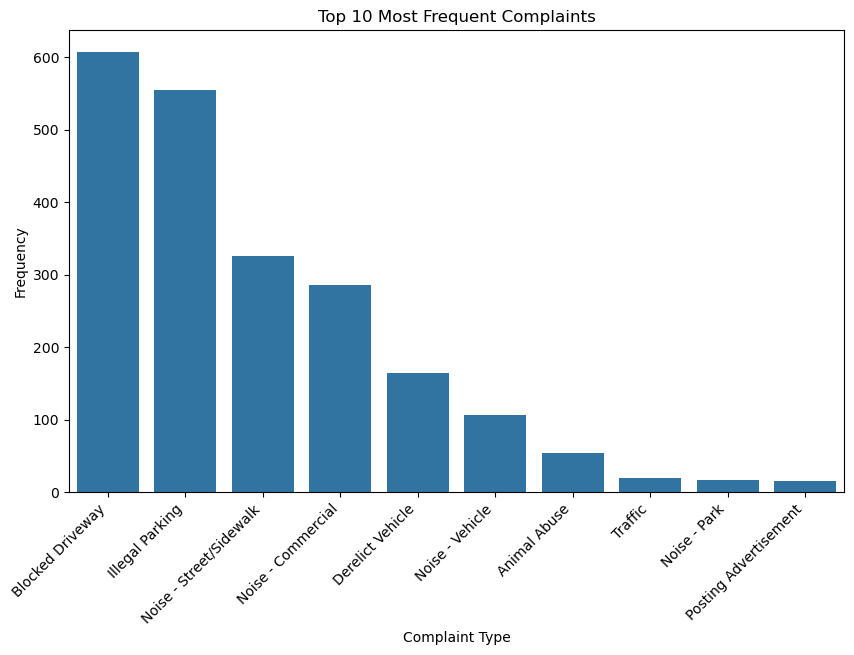

In [22]:
# Insight 1: Frequency of Complaints by Type (Bar Plot)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size
complaint_counts = data_cleaned['Complaint Type'].value_counts().head(10)  # Get top 10 complaint types
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)  # Create a bar plot

# Set title and labels
plt.title('Top 10 Most Frequent Complaints')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

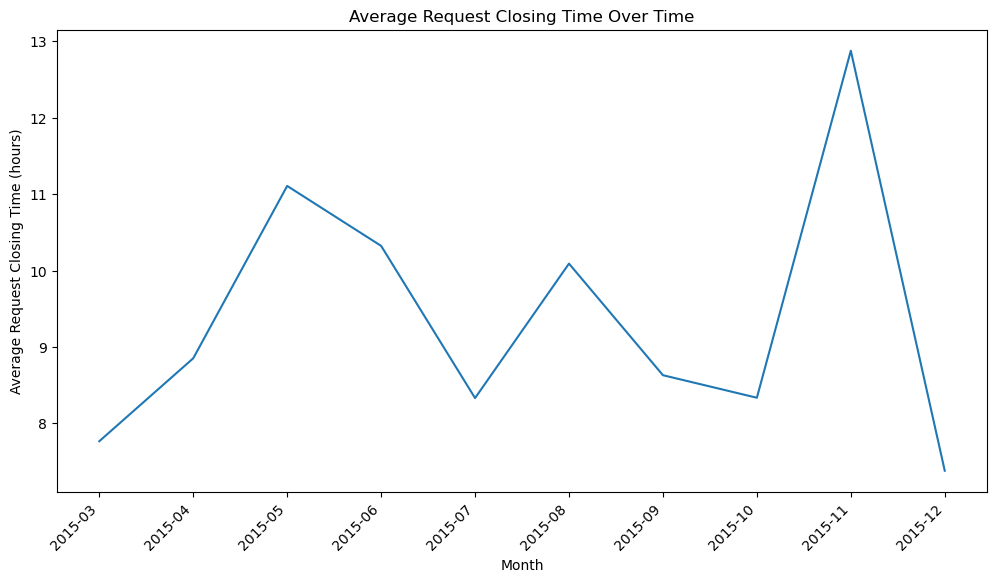

In [24]:
# Insight 2: Trend of Request Closing Time Over Time (Line Plot)
import matplotlib.pyplot as plt
import seaborn as sns

data_cleaned['Created Date'] = pd.to_datetime(data_cleaned['Created Date'], errors='coerce')  # Ensure 'Created Date' is in datetime format

# Group by 'Created Date' (could be daily, weekly, monthly) and calculate the average 'Request_Closing_Time'
data_cleaned['Month'] = data_cleaned['Created Date'].dt.to_period('M')  # Grouping by month
avg_closing_time = data_cleaned.groupby('Month')['Request_Closing_Time'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_closing_time.index.astype(str), y=avg_closing_time.values)

# Set title and labels
plt.title('Average Request Closing Time Over Time')
plt.xlabel('Month')
plt.ylabel('Average Request Closing Time (hours)')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

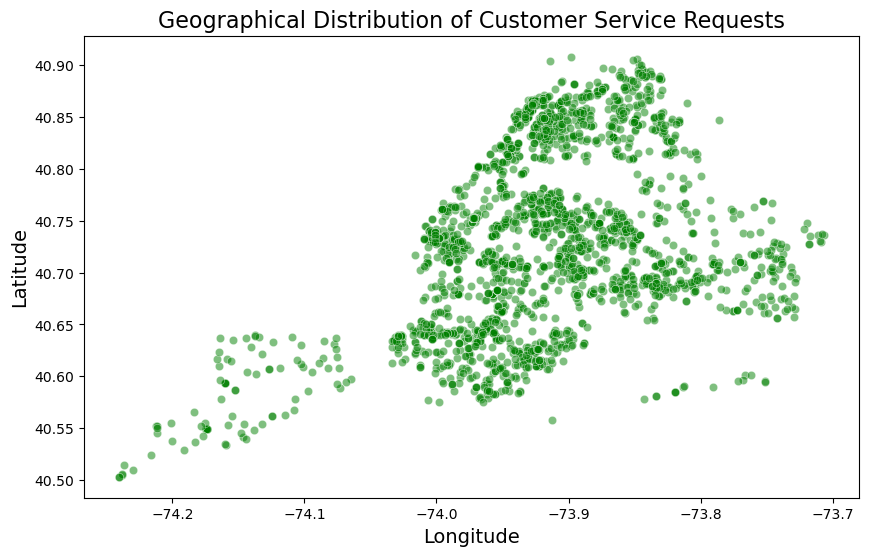

In [28]:
# Insight 3: Geographical Distribution of Customer Service Requests
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to show the relationship between 'Longitude' and 'Latitude'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=data_cleaned, color='green', alpha=0.5)

# Set title and labels
plt.title('Geographical Distribution of Customer Service Requests', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Display the plot
plt.show()

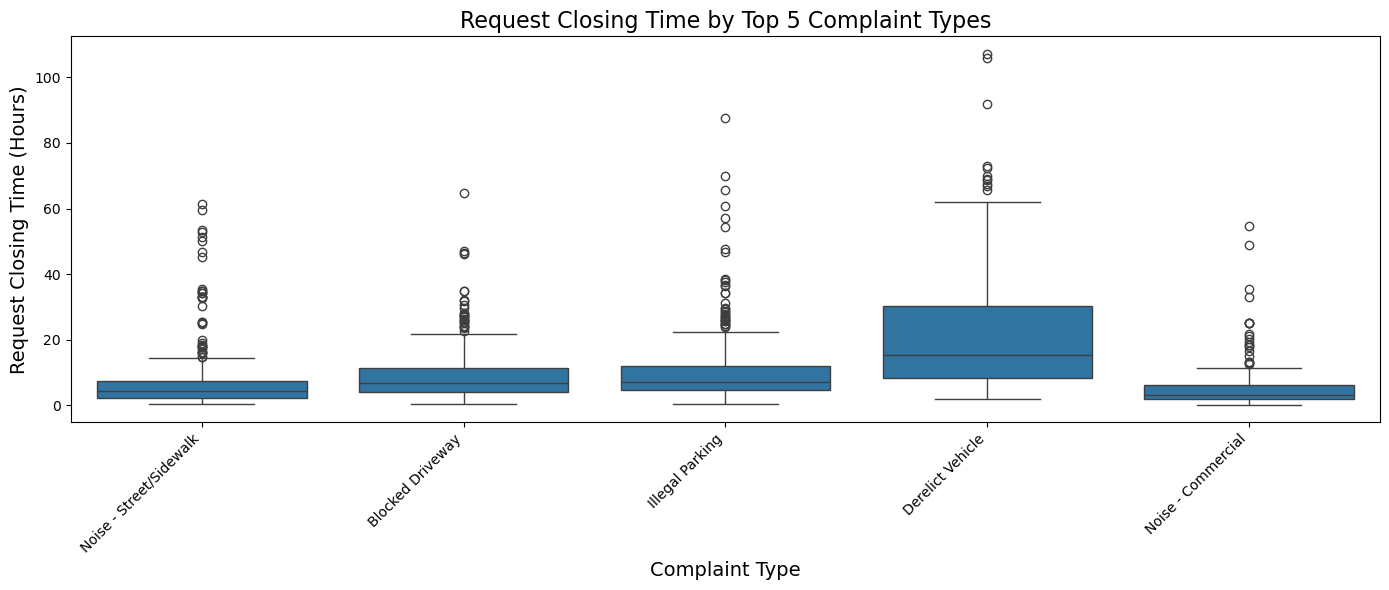

In [56]:
# Insight 4: Request Closing Time by Complaint Type (Box Plot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 5 most common complaint types
top_types = data_cleaned['Complaint Type'].value_counts().nlargest(5).index

# Filter dataset for only those top 5 complaint types
filtered_data = data_cleaned[data_cleaned['Complaint Type'].isin(top_types)]

# Create the box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Complaint Type', y='Request_Closing_Time', data=filtered_data)

# Set plot titles and labels
plt.title('Request Closing Time by Top 5 Complaint Types', fontsize=16)
plt.xlabel('Complaint Type', fontsize=14)
plt.ylabel('Request Closing Time (Hours)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

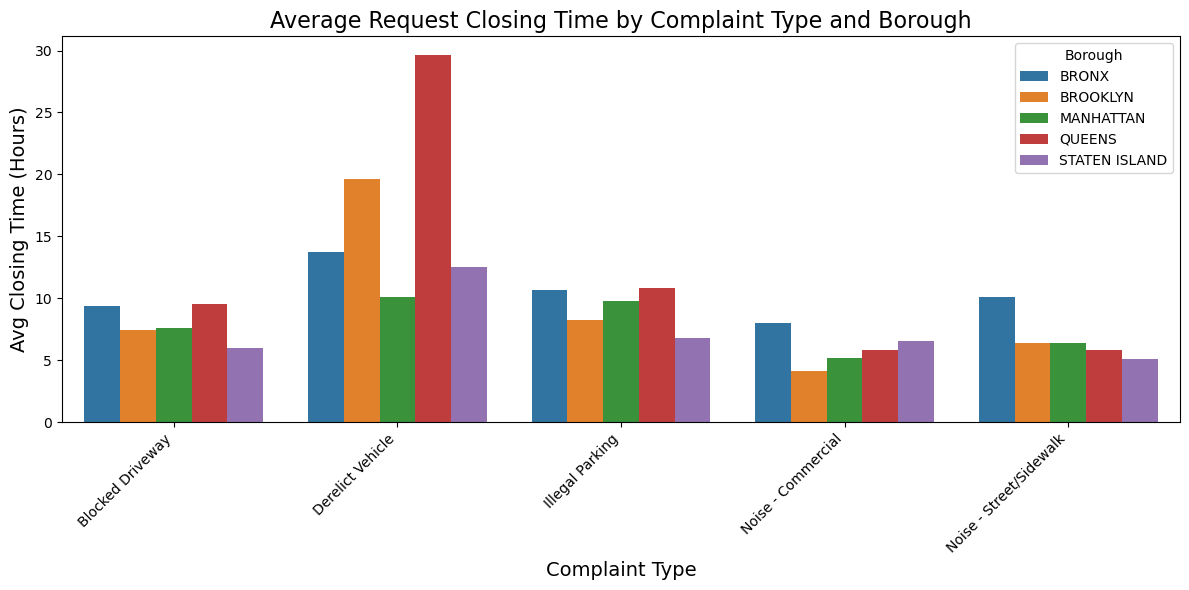

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average Request_Closing_Time by Complaint Type and Borough
avg_closing_time = (
    data_cleaned.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time']
    .mean()
    .reset_index()
)

# Filter top 5 most common complaint types to keep the plot clean
top_complaints = data_cleaned['Complaint Type'].value_counts().nlargest(5).index
filtered_data = avg_closing_time[avg_closing_time['Complaint Type'].isin(top_complaints)]

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_data,
    x='Complaint Type',
    y='Request_Closing_Time',
    hue='Borough'
)

# Set plot labels and title
plt.title('Average Request Closing Time by Complaint Type and Borough', fontsize=16)
plt.xlabel('Complaint Type', fontsize=14)
plt.ylabel('Avg Closing Time (Hours)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Borough')
plt.tight_layout()

# Show plot
plt.show()

In [65]:
import pandas as pd
import scipy.stats as stats

# Filter top 5 complaint types for a focused analysis
top_complaints = data_cleaned['Complaint Type'].value_counts().nlargest(5).index
filtered_data = data_cleaned[data_cleaned['Complaint Type'].isin(top_complaints)]

# Group data by Complaint Type
groups = [group['Request_Closing_Time'].values for name, group in filtered_data.groupby('Complaint Type')]

# State the hypotheses
print("Null Hypothesis (H0): The average Request_Closing_Time is the same across all complaint types.")
print("Alternative Hypothesis (H1): At least one complaint type has a different average Request_Closing_Time.\n")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Show the result
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: Since p-value is less than 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in average closing times across complaint types.")
else:
    print("\nResult: Since p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in average closing times across complaint types.")

Null Hypothesis (H0): The average Request_Closing_Time is the same across all complaint types.
Alternative Hypothesis (H1): At least one complaint type has a different average Request_Closing_Time.

ANOVA F-statistic: 98.4802
P-value: 0.0000

Result: Since p-value is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant difference in average closing times across complaint types.


In [69]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_cleaned['Complaint Type'], data_cleaned['Borough'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the hypotheses and results
print("Null Hypothesis (H0): There is no relationship between the type of complaint/service requested and the location (borough).")
print("Alternative Hypothesis (H1): There is a relationship between the type of complaint/service requested and the location (borough).")

print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table: \n{expected}")

# Interpretation of the p-value
if p_value < 0.05:
    print("\nResult: Since p-value is less than 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant relationship between the type of complaint/service requested and the location.")
else:
    print("\nResult: Since p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant relationship between the type of complaint/service requested and the location.")

Null Hypothesis (H0): There is no relationship between the type of complaint/service requested and the location (borough).
Alternative Hypothesis (H1): There is a relationship between the type of complaint/service requested and the location (borough).

Chi-Square Statistic: 947.8805195801567
P-value: 2.5312240939951874e-162
Degrees of Freedom: 56
Expected Frequencies Table: 
[[9.90825688e+00 1.52091743e+01 9.23944954e+00 1.72651376e+01
  2.37798165e+00]
 [1.11376147e+02 1.70962385e+02 1.03858257e+02 1.94072936e+02
  2.67302752e+01]
 [3.00917431e+01 4.61908257e+01 2.80605505e+01 5.24348624e+01
  7.22201835e+00]
 [9.17431193e-01 1.40825688e+00 8.55504587e-01 1.59862385e+00
  2.20183486e-01]
 [1.28440367e+00 1.97155963e+00 1.19770642e+00 2.23807339e+00
  3.08256881e-01]
 [5.50458716e-01 8.44954128e-01 5.13302752e-01 9.59174312e-01
  1.32110092e-01]
 [1.01834862e+02 1.56316514e+02 9.49610092e+01 1.77447248e+02
  2.44403670e+01]
 [5.22935780e+01 8.02706422e+01 4.87637615e+01 9.11215596e+01
